<a href="https://colab.research.google.com/github/BFry13/Venus_Game_of_Life/blob/main/GameOfLifeCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Readme**
---
---
## Run the following cells first:
- Imports
- Function Definitions
 - The 'plot'function has lines which are commented out, these can be included. The lines which can be included are code lines from line 419 to line 481. The lines are to add additional viewing angles to the plot.
---
## The following cells can be altered based on what Game of Life you are planning on simulating:
- Rules and Conditions for Simulation
 - The cell covers the major rules for the simulation including:
   - The Rules for the Game of Life simulation (the number of neighbours required for an empty cell to come to life and the number of neighbours required for a cell to survive)
   - The folder the .png and .gif files will be saved to in the local Google Colab storage.
   - The criteria for the droplet(s) the life is confined within.
   - The number of generations the simulation will run for (provided the life doesn't die out prematurely).
   - The zoom for the .png and .gif files
- Droplet Volume Calculator and Surface Area Calculator
 - This cell is where the volume of the droplet is calculated and eccentricity and sphericity or calculated and displayed for the user.
- Starting Generation (Visualising Generation 0)
 - This cell displays the simulation at generation zero (i.e., before the Game of Life is initiated).
- Making the .png files
 - This cell can be altered depending on how the droplet will change across generations. Included in this cell are:
    - The droplet changing size
    - The droplet changing velocity
    - The mergers and fragmentation of the droplet
---
## The following cells are then used to run the simulation over a given number of generations:
- Making the .gif file
- Downloading .png and .gif files
- Displaying the .gif file
---
## Run the final cell to delete the files created in the local storage:
- Deleting unwanted files
---
## The viability of the simulation on Venus was tested:
- Practicality of Simulation

# Imports

In [ ]:
#@title
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import itertools
from google.colab import output
from google.colab import files
import os.path
from os import path
import shutil
from IPython.display import Image as IM
from PIL import Image
import glob

# Function Definitions

This cell is comprised of:
*   The Cuboid Data Function - The function which creates the life cells, these are represented as a 1 x 1 x 1 cube.
*   The Game of Life Function - The main function definition for this notebook to find the next generation of living cells.
*   The Droplet Edge Function - The function which finds the edge of a given droplet, this is used to find when two droplets overlap.
*   The Plotting Function - The function for displaying the life and the droplet(s).
*   The Merger Calculator Function - The function for calculating the conditions post droplet merger.

In [ ]:
#@title
def cube_positions(position, size=(1,1,1)):
  length = size[0]; width = size[1]; height = size[2];
  x = [[position[0], position[0] + length, position[0] + length, position[0], position[0]],
        [position[0], position[0] + length, position[0] + length, position[0], position[0]],
        [position[0], position[0] + length, position[0] + length, position[0], position[0]],
        [position[0], position[0] + length, position[0] + length, position[0], position[0]]]
  y = [[position[1], position[1], position[1] + width, position[1] + width, position[1]],
        [position[1], position[1], position[1] + width, position[1] + width, position[1]],
        [position[1], position[1], position[1], position[1], position[1]],
        [position[1] + width, position[1] + width, position[1] + width, position[1] + width, position[1] + width]]
  z = [[position[2], position[2], position[2], position[2], position[2]],
        [position[2] + height, position[2] + height, position[2] + height, position[2] + height, position[2] + height],
        [position[2], position[2], position[2] + height, position[2] + height, position[2]],
        [position[2], position[2], position[2] + height, position[2] + height, position[2]]]
  return np.array(x), np.array(y), np.array(z)

def plot_cube(position=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    if ax !=None:
        X, Y, Z = cube_positions(position, size)
        ax.plot_surface(X, Y, Z, **kwargs)




# Finding the next generation of cells using the Game of Life
def nextGen(Generation_number, positions_1, droplet_1_centre, droplet_2_centre, droplet_1_motion, droplet_2_motion, droplet_1_radius=3, droplet_2_radius=3,
            droplet_1_semi_major_axis=2, droplet_1_semi_minor_axis=1, droplet_2_semi_major_axis=1, droplet_2_semi_minor_axis=1, born=[4,5], survive=[4,5], cell_size=[1,1,1]):

  new_positions = []
  if cell_size == [1,1,1]:
    for i in positions_1:
      position_x = (round(i[0] * 2) / 2)
      position_y = (round(i[1] * 2) / 2)
      position_z = (round(i[2] * 2) / 2)
      new_position = (position_x, position_y, position_z)
      new_positions.append(new_position)
  if cell_size == [0.5, 0.5, 0.5]:
    for i in positions_1:
      position_x = (round(i[0] * 4) / 4)
      position_y = (round(i[1] * 4) / 4)
      position_z = (round(i[2] * 4) / 4)
      new_position = (position_x, position_y, position_z)
      new_positions.append(new_position)

  new_positions = list(dict.fromkeys(new_positions))

  positions_1 = new_positions

  all_relevant_cells_1 = [];
  for i in positions_1:
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] - cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] - cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] - cell_size[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1], i[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] + cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] + cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0] - cell_size[0], i[1] + cell_size[1], i[2] + cell_size[2]))

    all_relevant_cells_1.append((i[0], i[1] - cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0], i[1] - cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0], i[1] - cell_size[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0], i[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0], i[1], i[2]))
    all_relevant_cells_1.append((i[0], i[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0], i[1] + cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0], i[1] + cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0], i[1] + cell_size[1], i[2] + cell_size[2]))

    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] - cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] - cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] - cell_size[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1], i[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1], i[2] + cell_size[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] + cell_size[1], i[2] - cell_size[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] + cell_size[1], i[2]))
    all_relevant_cells_1.append((i[0] + cell_size[0], i[1] + cell_size[1], i[2] + cell_size[2]))

  # remove duplicates from this list to prevent them being counted more than once
  all_relevant_cells_1 = list(dict.fromkeys(all_relevant_cells_1))

  # check whether the list of new positions overlaps the edge of the droplet:
  remove_cells_1 = []; remove_cells_2 = [];
  a_1 = droplet_1_semi_major_axis; c_1 = droplet_1_semi_minor_axis;
  a_2 = droplet_2_semi_major_axis; c_2 = droplet_2_semi_minor_axis;

  # life from droplet 1
  # creating a list of cells which need to be removed which are either outside of droplet 1 and outside of droplet 2
  # adding the cells outside of droplet 1 to a list
  for index in range(0, len(all_relevant_cells_1)):
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(all_relevant_cells_1[index])
    # adding the cells outside of droplet 2 to a list
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + 0 - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])
    if ((((all_relevant_cells_1[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((all_relevant_cells_1[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((all_relevant_cells_1[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(all_relevant_cells_1[index])

  remove_cells_1 = list(dict.fromkeys(remove_cells_1));
  remove_cells_2 = list(dict.fromkeys(remove_cells_2));

  # the cells which are outside of both droplets are removed
  for cells_1 in remove_cells_1:
    for cells_2 in remove_cells_2:
      if cells_1 == cells_2:
        all_relevant_cells_1.remove(cells_2)

  new_positions_1 = [];
  # checking every cell where there could be life
  for i in all_relevant_cells_1:
    aliveNeighbours = 0
    # these are checked against cells where there is currently life
    for j in positions_1:
      if i[0] == j[0] + cell_size[0] and i[1] == j[1] + cell_size[1] and i[2] == j[2] + cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] + cell_size[0] and i[1] == j[1] + cell_size[1] and i[2] == j[2] - cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] + cell_size[0] and i[1] == j[1] - cell_size[1] and i[2] == j[2] + cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] + cell_size[0] and i[1] == j[1] - cell_size[1] and i[2] == j[2] - cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] - cell_size[0] and i[1] == j[1] + cell_size[1] and i[2] == j[2] + cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] - cell_size[0] and i[1] == j[1] + cell_size[1] and i[2] == j[2] - cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] - cell_size[0] and i[1] == j[1] - cell_size[1] and i[2] == j[2] + cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] - cell_size[0] and i[1] == j[1] - cell_size[1] and i[2] == j[2] - cell_size[2]:
        aliveNeighbours += 1
      if i[0] == j[0] and i[1] == j[1]:
        if i[2] == j[2] + cell_size[2]:
          aliveNeighbours += 1
        if i[2] == j[2] - cell_size[2]:
          aliveNeighbours += 1
      if i[1] == j[1] and i[2] == j[2]:
        if i[0] == j[0] + cell_size[0]:
          aliveNeighbours += 1
        if i[0] == j[0] - cell_size[0]:
          aliveNeighbours += 1
      if i[2] == j[2] and i[0] == j[0]:
        if i[1] == j[1] + cell_size[1]:
          aliveNeighbours += 1
        if i[1] == j[1] - cell_size[1]:
          aliveNeighbours += 1
      if i[0] == j[0]:
        if i[1] == j[1] + cell_size[1] and i[2] == j[2] + cell_size[2]:
          aliveNeighbours += 1
        if i[1] == j[1] + cell_size[1] and i[2] == j[2] - cell_size[2]:
          aliveNeighbours += 1
        if i[1] == j[1] - cell_size[1] and i[2] == j[2] + cell_size[2]:
          aliveNeighbours += 1
        if i[1] == j[1] - cell_size[1] and i[2] == j[2] - cell_size[2]:
          aliveNeighbours += 1
      if i[1] == j[1]:
        if i[0] == j[0] + cell_size[0] and i[2] == j[2] + cell_size[2]:
          aliveNeighbours += 1
        if i[0] == j[0] + cell_size[0] and i[2] == j[2] - cell_size[2]:
          aliveNeighbours += 1
        if i[0] == j[0] - cell_size[0] and i[2] == j[2] + cell_size[2]:
          aliveNeighbours += 1
        if i[0] == j[0] - cell_size[0] and i[2] == j[2] - cell_size[2]:
          aliveNeighbours += 1
      if i[2] == j[2]:
        if i[0] == j[0] + cell_size[0] and i[1] == j[1] + cell_size[1]:
          aliveNeighbours += 1
        if i[0] == j[0] + cell_size[0] and i[1] == j[1] - cell_size[1]:
          aliveNeighbours += 1
        if i[0] == j[0] - cell_size[0] and i[1] == j[1] + cell_size[1]:
          aliveNeighbours += 1
        if i[0] == j[0] - cell_size[0] and i[1] == j[1] - cell_size[1]:
          aliveNeighbours += 1

  # for blinker keep all of the below
  # for accordian remove third point
  # adding in new 'born' cells
    if i not in positions_1 and aliveNeighbours in born:
      new_positions_1.append(i)
    # if i not in positions_1 and aliveNeighbours == 5: # backup
    #   new_positions_1.append(i)
  # keeping cells with the 'necessary' number of neighbours alive
    if i in positions_1 and aliveNeighbours in survive:
      new_positions_1.append(i)
    # if i in positions_1 and aliveNeighbours == 4: # backup
    #   new_positions_1.append(i)

  # allocating all of the life cells to either droplet 1 or droplet 2 for their corresponding movement
  droplet_1 = []; droplet_2 = [];
  for position in new_positions_1:
    if ((((position[0] + 0 - droplet_1_centre[0])**2) + ((position[1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + 0 - droplet_1_centre[0])**2) + ((position[1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + 0 - droplet_1_centre[0])**2) + ((position[1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + 0 - droplet_1_centre[0])**2) + ((position[1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + cell_size[0] - droplet_1_centre[0])**2) + ((position[1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + cell_size[0] - droplet_1_centre[0])**2) + ((position[1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + cell_size[0] - droplet_1_centre[0])**2) + ((position[1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)
    if ((((position[0] + cell_size[0] - droplet_1_centre[0])**2) + ((position[1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((position[2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) <= (droplet_1_radius**2):
      droplet_1.append(position)

    if ((((position[0] + 0 - droplet_2_centre[0])**2) + ((position[1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + 0 - droplet_2_centre[0])**2) + ((position[1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + 0 - droplet_2_centre[0])**2) + ((position[1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + 0 - droplet_2_centre[0])**2) + ((position[1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + cell_size[0] - droplet_2_centre[0])**2) + ((position[1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + cell_size[0] - droplet_2_centre[0])**2) + ((position[1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + cell_size[0] - droplet_2_centre[0])**2) + ((position[1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)
    if ((((position[0] + cell_size[0] - droplet_2_centre[0])**2) + ((position[1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((position[2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) <= (droplet_2_radius**2):
      droplet_2.append(position)

  droplet_1 = list(dict.fromkeys(droplet_1));
  droplet_2 = list(dict.fromkeys(droplet_2));

  post_move_positions_1 = []; moved_positions_1 = []
  post_move_positions_2 = []; moved_positions_2 = []
  post_move_positions_3 = []; moved_positions_3 = []
  post_move_positions_4 = []; moved_positions_4 = []
  new_positions_a = []; new_positions_b = []; new_positions_c = []; new_positions_d = [];

  for position in new_positions_1:
    if position in droplet_1 and position not in droplet_2:
      for k in range(0, len(droplet_1_motion)):
        moved_positions_1.append((position[k] + droplet_1_motion[k]))
      post_move_positions_1.append(moved_positions_1)
      moved_positions_1 = []
    if post_move_positions_1 != []:
      new_positions_a = post_move_positions_1

    if position in droplet_2 and position not in droplet_1:
      for k in range(0, len(droplet_2_motion)):
        moved_positions_2.append((position[k] + droplet_2_motion[k]))
      post_move_positions_2.append(moved_positions_2)
      moved_positions_2 = []
    if post_move_positions_2 != []:
      new_positions_b = post_move_positions_2

    if position in droplet_1 and position in droplet_2:
      if droplet_1_motion == droplet_2_motion:
        for k in range(0, len(droplet_1_motion)):
          moved_positions_3.append((position[k] + droplet_1_motion[k]))
        post_move_positions_3.append(moved_positions_3)
        moved_positions_3 = []
      if post_move_positions_3 != []:
        new_positions_c = post_move_positions_3
      if droplet_1_motion != droplet_2_motion:
        for k in range(0, len(droplet_1_motion)):
          moved_positions_3.append((position[k] + droplet_1_motion[k]))
        post_move_positions_3.append(moved_positions_3)
        moved_positions_3 = []
      if post_move_positions_3 != []:
        new_positions_c = post_move_positions_3
        for k in range(0, len(droplet_2_motion)):
          moved_positions_4.append((position[k] + droplet_2_motion[k]))
        post_move_positions_4.append(moved_positions_4)
        moved_positions_4 = []
      if post_move_positions_4 != []:
        new_positions_d = post_move_positions_4

  new_positions = []
  new_positions = new_positions_a + new_positions_b + new_positions_c + new_positions_d

  remove_cells_1 = []; remove_cells_2 = [];
  for index in range(0, len(new_positions)):
    # adding the cells outside of droplet 1 to a list
    if ((((new_positions[index][0] + 0 - droplet_1_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_1_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_1_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_1_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + 0 - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_1_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_1_centre[1])**2))/a_1**2) + (((new_positions[index][2] + cell_size[2] - droplet_1_centre[2])**2)/(c_1**2)) > (droplet_1_radius**2):
      remove_cells_1.append(new_positions[index])
    # adding the cells outside of droplet 2 to a list
    if ((((new_positions[index][0] + 0 - droplet_2_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_2_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_2_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + 0 - droplet_2_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((new_positions[index][1] + 0 - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + 0 - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])
    if ((((new_positions[index][0] + cell_size[0] - droplet_2_centre[0])**2) + ((new_positions[index][1] + cell_size[1] - droplet_2_centre[1])**2))/a_2**2) + (((new_positions[index][2] + cell_size[2] - droplet_2_centre[2])**2)/(c_2**2)) > (droplet_2_radius**2):
      remove_cells_2.append(new_positions[index])

  new_remove_cells_1 = []
  for item in remove_cells_1:
      if item not in new_remove_cells_1:
          new_remove_cells_1.append(item)
  remove_cells_1 = new_remove_cells_1

  new_remove_cells_2 = []
  for item in remove_cells_2:
      if item not in new_remove_cells_2:
          new_remove_cells_2.append(item)
  remove_cells_2 = new_remove_cells_2

  # the cells which are outside of both droplets are removed
  for cells_1 in remove_cells_1:
    for cells_2 in remove_cells_2:
      if cells_1 == cells_2:
        new_positions.remove(cells_2)

  return new_positions




# finding the edge of a droplet - used when two droplets overlap
def droplet_edge(droplet_centre, droplet_radius, droplet_semi_major_axis, droplet_semi_minor_axis, cell_size):
  all_internal_positions = [];
  for x in range(int(droplet_centre[0] - droplet_semi_major_axis*droplet_radius), int(droplet_centre[0] + droplet_semi_major_axis*droplet_radius)+1):
    for y in range(int(droplet_centre[1] - droplet_semi_major_axis*droplet_radius), int(droplet_centre[1] + droplet_semi_major_axis*droplet_radius)+1):
      for z in range(int(droplet_centre[2] - droplet_semi_major_axis*droplet_radius), int(droplet_centre[2] + droplet_semi_major_axis*droplet_radius)+1):
        all_internal_positions.append([x, y, z])

  new_positions = []
  for positions in all_internal_positions:
    new_positions.append([positions[0],positions[1],positions[2]])

  all_internal_positions = new_positions

  remove_cells = []; a_1 = droplet_semi_major_axis; c_1 = droplet_semi_minor_axis;
  # checking to see if it overlaps with droplet 1
  for index in range(0, len(all_internal_positions)):
    if ((((all_internal_positions[index][0] + 0 - droplet_centre[0])**2) + ((all_internal_positions[index][1] + 0 - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + 0 - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + 0 - droplet_centre[0])**2) + ((all_internal_positions[index][1] + 0 - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + cell_size[2]- droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + 0 - droplet_centre[0])**2) + ((all_internal_positions[index][1] + cell_size[1] - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + 0 - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + 0 - droplet_centre[0])**2) + ((all_internal_positions[index][1] + cell_size[1] - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + cell_size[2] - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + cell_size[0] - droplet_centre[0])**2) + ((all_internal_positions[index][1] + 0 - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + 0 - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + cell_size[0] - droplet_centre[0])**2) + ((all_internal_positions[index][1] + 0 - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + cell_size[2] - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + cell_size[0] - droplet_centre[0])**2) + ((all_internal_positions[index][1] + cell_size[1] - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + 0 - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])
    if ((((all_internal_positions[index][0] + cell_size[0] - droplet_centre[0])**2) + ((all_internal_positions[index][1] + cell_size[1] - droplet_centre[1])**2))/a_1**2) + (((all_internal_positions[index][2] + cell_size[2] - droplet_centre[2])**2)/(c_1**2)) > (droplet_radius**2):
      remove_cells.append(all_internal_positions[index])

  if remove_cells != []:
    for cells in remove_cells:
      if cells in all_internal_positions:
        all_internal_positions.remove(cells)

  return all_internal_positions




# the plotting definition - used to plot out each .png file
def plot(Zoom, Generation_number, droplet_1_centre, droplet_1_motion, droplet_2_centre, droplet_2_motion, initial_positions, old_positions, new_positions=[],
         droplet_1_radius=5, droplet_2_radius=2, folder_number = 0, droplet_1_semi_major_axis=2, droplet_1_semi_minor_axis=1, droplet_2_semi_major_axis=2,
         droplet_2_semi_minor_axis=1, cmap=plt.cm.YlGnBu_r, cmap1=plt.cm.YlGnBu_r, droplet_transparency=0.5, cell_size=(1,1,1)):

  sizes = []; colours=[]

  for i in range(0, len(new_positions)):
    sizes.append(cell_size)
    colours.append("blue")

  fig = plt.figure()
  # ax1 = fig.add_subplot(1, 4, 1, projection='3d'); ax2 = fig.add_subplot(1, 4, 2, projection='3d'); ax3 = fig.add_subplot(1, 4, 3, projection='3d'); ax4 = fig.add_subplot(1, 4, 4, projection='3d')
  # ax1 = fig.add_subplot(1, 3, 1, projection='3d'); ax2 = fig.add_subplot(1, 3, 2, projection='3d'); ax3 = fig.add_subplot(1, 3, 3, projection='3d')
  ax2 = fig.add_subplot(1, 1, 1, projection='3d');
  fig.set_size_inches(20, 10)

  for position, size, colour in zip(new_positions, sizes, colours):
      # plot_cube(position=position, size=size, ax=ax1, color=colour, alpha=0.4)
      plot_cube(position=position, size=size, ax=ax2, color=colour, alpha=0.4)
      # plot_cube(position=position, size=size, ax=ax3, color=colour, alpha=0.4)
      # plot_cube(position=position, size=size, ax=ax4, color=colour, alpha=0.4)

  # plotting the boundary of the droplet:
  r_1 = droplet_1_radius; r_2 = droplet_2_radius
  a_1 = droplet_1_semi_major_axis; a_2 = droplet_2_semi_major_axis # semi-major axis
  c_1 = droplet_1_semi_minor_axis; c_2 = droplet_2_semi_minor_axis # semi-minor axis
  u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
  x_1 = a_1 * r_1 * np.cos(u) * np.sin(v); y_1 = a_1 * r_1 * np.sin(u) * np.sin(v); z_1 = c_1 * r_1 * np.cos(v)
  x_2 = a_2 * r_2 * np.cos(u) * np.sin(v); y_2 = a_2 * r_2 * np.sin(u) * np.sin(v); z_2 = c_2 * r_2 * np.cos(v)

  droplet_1_movement = []; droplet_2_movement = []
  for i in range(0, len(droplet_1_motion)):
    droplet_1_movement.append(droplet_1_centre[i] + (droplet_1_motion[i]))

  for i in range(0, len(droplet_2_motion)):
    droplet_2_movement.append(droplet_2_centre[i] + (droplet_2_motion[i]))

  # ax1.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=droplet_transparency);
  # ax1.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap1, alpha=droplet_transparency);

  ax2.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=droplet_transparency);
  ax2.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap1, alpha=droplet_transparency);

  # ax3.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=droplet_transparency);
  # ax3.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap1, alpha=droplet_transparency);

  # ax4.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=droplet_transparency);
  # ax4.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap1, alpha=droplet_transparency);

  # ax1.axes.set_xlim3d(left=(droplet_1_movement[0] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax1.axes.set_ylim3d(bottom=(droplet_1_movement[1] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax1.axes.set_zlim3d(bottom=(droplet_1_movement[2] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));

  ax2.axes.set_xlim3d(left=(droplet_1_movement[0] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  ax2.axes.set_ylim3d(bottom=(droplet_1_movement[1] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  ax2.axes.set_zlim3d(bottom=(droplet_1_movement[2] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));

  # ax3.axes.set_xlim3d(left=(droplet_1_movement[0] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax3.axes.set_ylim3d(bottom=(droplet_1_movement[1] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax3.axes.set_zlim3d(bottom=(droplet_1_movement[2] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));

  # ax4.axes.set_xlim3d(left=(droplet_1_movement[0] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax4.axes.set_ylim3d(bottom=(droplet_1_movement[1] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));
  # ax4.axes.set_zlim3d(bottom=(droplet_1_movement[2] - Zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + Zoom*droplet_1_radius*droplet_1_semi_major_axis));

  # ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
  ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
  # ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
  # ax4.set_xlabel('X'); ax4.set_ylabel('Y'); ax4.set_zlabel('Z')

  # ax1.set_axis_off(); ax2.set_axis_off(); ax3.set_axis_off(); ax4.view_init(90, -45)
  ax2.set_axis_off();

  # ax1.view_init(0,-45); ax2.view_init(45,-45); ax3.view_init(90, -45); ax4.view_init(90, -45)
  ax2.view_init(45,-45);

  # fig.suptitle('Generation {}'.format(Generation_number), size=18, y=0.75)
  if Generation_number < 10:
    return plt.savefig('/content/Images{}/Generation_000{}'.format(folder_number, Generation_number))
  elif Generation_number < 100:
    return plt.savefig('/content/Images{}/Generation_00{}'.format(folder_number, Generation_number))
  elif Generation_number < 1000:
    return plt.savefig('/content/Images{}/Generation_0{}'.format(folder_number, Generation_number))
  else:
    return plt.savefig('/content/Images{}/Generation_{}'.format(folder_number, Generation_number))
  # return plt.show()




# the merger definition - used to find the new velocity, radius and centre after two droplets merge
def merger(droplet_1_centre, droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius, droplet_2_semi_major_axis, droplet_2_semi_minor_axis, droplet_1_motion, droplet_2_motion):
  volume_droplet_1 = 4/3 * np.pi * droplet_1_radius**3 * droplet_1_semi_major_axis**2 * droplet_1_semi_minor_axis
  volume_droplet_2 = 4/3 * np.pi * droplet_2_radius**3 * droplet_2_semi_major_axis**2 * droplet_2_semi_minor_axis
  total_volume = volume_droplet_1 + volume_droplet_2
  # using the conservation of momentum to calculate the new motion of the new droplet
  # m1v1 + m2v2 = m3v3
  new_motion_1 = ((volume_droplet_1 * droplet_1_motion[0]) + (volume_droplet_2 * droplet_2_motion[0]))/(total_volume)
  new_motion_2 = ((volume_droplet_1 * droplet_1_motion[1]) + (volume_droplet_2 * droplet_2_motion[1]))/(total_volume)
  new_motion_3 = ((volume_droplet_1 * droplet_1_motion[2]) + (volume_droplet_2 * droplet_2_motion[2]))/(total_volume)

  new_droplet_1_motion = [new_motion_1, new_motion_2, new_motion_3]

  # using the conservation of mass (or volume in this case) to find the new radius of the new droplet
  new_droplet_1_radius = ((volume_droplet_1 + volume_droplet_2) / ((4.0/3.0) * np.pi))**(1.0/3.0)

  new_droplet_1_centre_1 = (volume_droplet_1 * droplet_1_centre[0] + volume_droplet_2 * droplet_2_centre[0]) / (total_volume)
  new_droplet_1_centre_2 = (volume_droplet_1 * droplet_1_centre[1] + volume_droplet_2 * droplet_2_centre[1]) / (total_volume)
  new_droplet_1_centre_3 = (volume_droplet_1 * droplet_1_centre[2] + volume_droplet_2 * droplet_2_centre[2]) / (total_volume)

  new_droplet_1_centre = [new_droplet_1_centre_1, new_droplet_1_centre_2, new_droplet_1_centre_3]

  return new_droplet_1_centre, new_droplet_1_motion, new_droplet_1_radius

# Rules and Conditions for Simulation

This cell defines the majority of the rules for the Game of Life. This includes the starting positions of the life, the rules for the Game of Life, the folder the .png and .gif files are saved to, the properties of droplet 1 and droplet 2, the total number of generations should the life not die prematurely and the zoom for the display.

In [ ]:
# decide how big a living cell will be
# cell_size = [1, 1, 1]
cell_size = [0.5, 0.5, 0.5]

# some starting configurations to choose from
positions_blink = [(-1.5,-0.5,-0.5), (-0.5,-1.5,-0.5), (-0.5,-0.5,-0.5), (-0.5,0.5,-0.5), (0.5,-0.5,-0.5), (-0.5,-0.5,0.5), (-0.5,-0.5,-1.5)]
multiple_positions_blink = [(2,3,3), (3,2,3), (3,3,3), (3,4,3), (4,3,3), (3,3,4), (3,3,2), (6,7,7), (7,6,7), (7,7,7), (7,8,7), (8,7,7), (7,7,8), (7,7,6)]
positions_accordion = [(-0.5, 0.5,-0.5), ( 0.5, 0.5,-0.5), ( 1.5, 0.5,-0.5), ( 0.5, 0.5, 0.5), ( 0.5, 0.5,-1.5)]
positions_bar = [(-0.5,-0.5,1.5), (-0.5,-0.5, 0.5), (-0.5, 0.5, 0.5), (-0.5, 0.5, 1.5), ( 0.5, 0.5, 0.5), ( 0.5,-0.5, 0.5), ( 0.5,-0.5, 1.5), ( 0.5, 0.5, 1.5), ( 1.5,-0.5, 0.5), ( 1.5,-0.5, 1.5), ( 1.5, 0.5, 0.5), ( 1.5, 0.5, 1.5), (2.5, -0.5, 0.5), ( 2.5, -0.5, 1.5), ( 2.5, 0.5, 0.5), ( 2.5, 0.5, 1.5)]
positions_test = [(3,3,3), (4,4,4), (4,3,3), (5,5,5), (4,5,4), (3,4,3), (6,5,4), (6,6,5)]
positions_random = [(-0.5,-0.5,-0.5), (-0.5,0.5,-0.5), (-0.5,-0.5,0.5), (1.5,1.5,1.5), (0.5,1.5,1.5), (1.5,1.5,0.5), (2.5,1.5,1.5), (0.5,0.5,0.5), (1.5,0.5,1.5), (2.5,-0.5,-0.5), (2.5,0.5,-0.5), (2.5,0.5,0.5), (2.5,1.5,0.5), (2.5,0.5,1.5), (1.5,-0.5,-0.5), (0.5,-0.5,-0.5), (1.5,-0.5,0.5)]
positions_sparse = [(0,0,0), (1,1,1), (3,1,3), (2,1,1), (1,1,3), (0,0,-1)] # (-1,0,1),
positions_sparse = [(i[0]-0.5, i[1]-0.5, i[2]-0.5) for i in positions_sparse]
positions_lines = [(0,0,0), (0,1,0), (0,2,0), (2,0,0), (2,1,0)]
positions_lines = [(i[0]-0.5, i[1]-0.5, i[2]-0.5) for i in positions_lines]
# boundary_positions = droplet_edge(droplet_1_centre, droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis)
positions_blank = []
for i in positions_test:
  positions_blank.append([i[0]-3, i[1]-3, i[2]-3])

# recalculating the starting positions if the life is 0.5 x 0.5 x 0.5 microns
if cell_size == [0.5, 0.5, 0.5]:
  positions_blink = [(i[0]/2, i[1]/2, i[2]/2) for i in positions_blink]
  positions_accordion = [(i[0]/2, i[1]/2, i[2]/2) for i in positions_accordion]
  positions_random = [(i[0]/2, i[1]/2, i[2]/2) for i in positions_random]
  positions_sparse = [(i[0]/2, i[1]/2, i[2]/2) for i in positions_sparse]
  positions_lines = [(i[0]/2, i[1]/2, i[2]/2) for i in positions_lines]



# the starting positions of the life
# new_positions = initial_positions = old_positions = positions_random
# new_positions = initial_positions = old_positions = positions_blink
new_positions = initial_positions = old_positions = positions_accordion

# Rules to change for the systematic search
#        0     1       2      3     4       5      6     7     8
List = [[2], [2,3], [2,3,4], [3], [3,4], [3,4,5], [4], [4,5], [5]]

# Rules for the Game Of Life:
# 'Life_born' is the number of alive neighbours an empty cell must have to have new life born
Life_born = [4,5] # default is [4,5]
# 'Life_survive' is the number of alive neighbours an alive cell must have to survive to the next generation
Life_survive = [2,3,4,5,6,7] # default is [4,5]

# setting the folder the .gif will be saved to
folder_number = 0

# droplet 1 variables:
droplet_1_centre = [ 0.5, 0.5, 0] # default is [1,1,0]
droplet_1_motion = [0,0,0] #[ 0.5, 0.2, 0.2]
droplet_1_radius = 1.272
droplet_1_semi_major_axis = 1.00
droplet_1_semi_minor_axis = 1.00

# droplet 2 variables
droplet_2_centre = [10,10,10]
droplet_2_motion = droplet_1_motion # [ -0.5, -0.5, -0.5]
droplet_2_radius = 1.50
droplet_2_semi_major_axis = 1.00
droplet_2_semi_minor_axis = 1.00

# radius at which the droplet will split
splitting_radius = 3.25
# number of generations for the .gif file to run through
Generations = 51

# starting positions zoom:
# higher number is zoomed further out
# zoom < 1.0 is smaller than the droplet, zoom > 1.0 is larger than the droplet
zoom = (3.0/droplet_1_radius) #(5.0/droplet_1_radius)

# the starting droplet colour
cmap_1 = plt.cm.YlGnBu_r

# the future droplet colours
cmap_2 = plt.cm.PuBuGn_r
cmap_3 = plt.cm.PuBu_r
cmap_4 = plt.cm.Purples_r
cmap_5 = cmap_1

cmap = cmap_1
# how see-through do you want the droplet
# 0.0 = see-through, 0.3 = default, 1.0 = opaque
droplet_transparency = 0.3

In [ ]:
# @title
print("The volume to droplet radius ratio is as follows:")
print("____________________________________________")
print("Radius = 1.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(1.0**3.0)))
print("Radius = 1.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(1.5**3.0)))
print("Radius = 2.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(2.0**3.0)))
print("Radius = 2.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(2.5**3.0)))
print("Radius = 3.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(3.0**3.0)))
print("Radius = 3.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(3.5**3.0)))
print("Radius = 4.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(4.0**3.0)))
print("Radius = 4.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(4.5**3.0)))
print("Radius = 5.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(5.0**3.0)))
print("Radius = 5.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(5.5**3.0)))
print("Radius = 6.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(6.0**3.0)))
print("Radius = 6.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(6.5**3.0)))
print("Radius = 7.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(7.0**3.0)))
print("Radius = 7.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(7.5**3.0)))
print("Radius = 8.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(8.0**3.0)))
print("Radius = 8.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(8.5**3.0)))
print("Radius = 9.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(9.0**3.0)))
print("Radius = 9.5 -> Volume = {:.3f}".format((4./3.)*np.pi*(9.5**3.0)))
print("Radius =10.0 -> Volume = {:.3f}".format((4./3.)*np.pi*(10.0**3.0)))

The volume to droplet radius ratio is as follows:
____________________________________________
Radius = 1.0 -> Volume = 4.189
Radius = 1.5 -> Volume = 14.137
Radius = 2.0 -> Volume = 33.510
Radius = 2.5 -> Volume = 65.450
Radius = 3.0 -> Volume = 113.097
Radius = 3.5 -> Volume = 179.594
Radius = 4.0 -> Volume = 268.083
Radius = 4.5 -> Volume = 381.704
Radius = 5.0 -> Volume = 523.599
Radius = 5.5 -> Volume = 696.910
Radius = 6.0 -> Volume = 904.779
Radius = 6.5 -> Volume = 1150.347
Radius = 7.0 -> Volume = 1436.755
Radius = 7.5 -> Volume = 1767.146
Radius = 8.0 -> Volume = 2144.661
Radius = 8.5 -> Volume = 2572.441
Radius = 9.0 -> Volume = 3053.628
Radius = 9.5 -> Volume = 3591.364
Radius =10.0 -> Volume = 4188.790


# Droplet Volume Calculator and Surface Area Calculator

$$ V_{p} = \dfrac{4}{3}*\pi*(b)^{2}*c $$

Where V is the volume of the oblate, b is the semi-major axis radius and c is the semi-minor axis radius.

The surface area of an oblate is given by:

$$ A_{p} = 2\pi a^{2} + \pi \dfrac{c^{2}}{e}log\biggl{(}\dfrac{1+e}{1-e}\biggr{)} $$

where A is the surface area, a is the semi-major axis radius, c is the semi-minor axis radius and e is the eccentricity, calculated using:

$$ e = \sqrt{1-\dfrac{c^{2}}{a^{2}}} $$

The sphericity of the oblate is then given by:

$$ \Psi = \dfrac{\pi^{1/3} (6 V_{p})^{2/3}}{A_{p}} $$

and the sphericity ($\Psi$) of a droplet will always lie in the range $0 \le \Psi \le 1$

In [ ]:
#@title
volume_droplet_1 = (4.0/3.0)*np.pi*(droplet_1_radius*droplet_1_semi_major_axis)*(droplet_1_radius*droplet_1_semi_major_axis)*(droplet_1_radius*droplet_1_semi_minor_axis)
volume_droplet_2 = (4.0/3.0)*np.pi*(droplet_2_radius*droplet_2_semi_major_axis)*(droplet_2_radius*droplet_2_semi_major_axis)*(droplet_2_radius*droplet_2_semi_minor_axis)

print("The volume of droplet 1 is {:.2f} μm\u00b3".format(volume_droplet_1))

radius_spherical_droplet_1 = (volume_droplet_1 / ((4.0/3.0)*(np.pi)))**(1.0/3.0)
print("The radius of a sphere with the same volume as droplet 1 is {:.3f} μm".format(radius_spherical_droplet_1))
SA_spherical_droplet_1 = 4*np.pi*radius_spherical_droplet_1*radius_spherical_droplet_1
print("The surface area of a spherical droplet with the same volume as droplet 1 is {:.3f} μm\u00b2.".format(SA_spherical_droplet_1))

print("\n")

# the eccentricity of droplet 1 is:
if droplet_1_semi_major_axis == droplet_1_semi_minor_axis:
  print("The eccentricity of droplet 1 is 0")
else:
  eccentricity_1 = ((1-(((droplet_1_radius*droplet_1_semi_minor_axis)*(droplet_1_radius*droplet_1_semi_minor_axis))/((droplet_1_radius*droplet_1_semi_major_axis)*(droplet_1_radius*droplet_1_semi_major_axis))))**0.5)
  print("The eccentricity of droplet 1 is {:.3f} (to 3 s.f.).".format(eccentricity_1))

# the surface area of droplet 1 is:
if droplet_1_semi_major_axis == droplet_1_semi_minor_axis:
  Ap1 = 4*np.pi*(droplet_1_radius*droplet_1_semi_major_axis*droplet_1_radius*droplet_1_semi_major_axis)
else:
  Ap1 = 2*np.pi*(droplet_1_radius*droplet_1_semi_major_axis)*(droplet_1_radius*droplet_1_semi_major_axis) + ((np.pi*(droplet_1_radius*droplet_1_semi_minor_axis)*(droplet_1_radius*droplet_1_semi_minor_axis))/(eccentricity_1))*np.log((1+eccentricity_1)/(1-eccentricity_1))
print("The surface area of droplet 1 is {:.3f} (to 3.s.f.).".format(Ap1))

# sphericity of droplet 1:
if droplet_1_semi_major_axis == droplet_1_semi_minor_axis:
  print("The sphericity of droplet 1 is 1.0")
else:
  psi_1 = np.pi**(1.0/3.0)*(6*volume_droplet_1)**(2.0/3.0) / Ap1
  print("The sphericity of droplet 1 is {:.3f} (to 3 s.f.).".format(psi_1))

print("\n")
print("The volume of droplet 2 is {:.2f} μm\u00b3".format(volume_droplet_2))

radius_spherical_droplet_2 = (volume_droplet_2 / ((4.0/3.0)*(np.pi)))**(1.0/3.0)
print("The radius of a sphere with the same volume as droplet 2 is {:.3f} μm".format(radius_spherical_droplet_2))
SA_spherical_droplet_2 = 4*np.pi*radius_spherical_droplet_2*radius_spherical_droplet_2
print("The surface area of a spherical droplet with the same volume as droplet 2 is {:.3f} μm\u00b2.".format(SA_spherical_droplet_2))

print("\n")

# the eccentricity of droplet 2 is:
if droplet_2_semi_major_axis == droplet_2_semi_minor_axis:
  print("The eccentricity of droplet 2 is 0")
else:
  eccentricity_2 = ((1-(((droplet_2_radius*droplet_2_semi_minor_axis)*(droplet_2_radius*droplet_2_semi_minor_axis))/((droplet_2_radius*droplet_2_semi_major_axis)*(droplet_2_radius*droplet_2_semi_major_axis))))**0.5)
  print("The eccentricity of droplet 2 is {:.3f} (to 3 s.f.).".format(eccentricity_2))

# the surface area of droplet 2 is:
if droplet_2_semi_major_axis == droplet_2_semi_minor_axis:
  Ap2 = 4*np.pi*(droplet_2_radius*droplet_2_semi_major_axis*droplet_2_radius*droplet_2_semi_major_axis)
else:
  Ap2 = 2*np.pi*(droplet_2_radius*droplet_2_semi_major_axis)*(droplet_2_radius*droplet_2_semi_major_axis) + ((np.pi*(droplet_2_radius*droplet_2_semi_minor_axis)*(droplet_2_radius*droplet_2_semi_minor_axis))/(eccentricity_2))*np.log((1+eccentricity_2)/(1-eccentricity_2))
print("The surface area of droplet 2 is {:.3f} (to 3.s.f.).".format(Ap2))

# sphericity of droplet 2:
if droplet_2_semi_major_axis == droplet_2_semi_minor_axis:
  print("The sphericity of droplet 1 is 1.0")
else:
  psi_2 = np.pi**(1.0/3.0)*(6*volume_droplet_2)**(2.0/3.0) / Ap2
  print("The sphericity of droplet 2 is {:.3f} (to 3 s.f.).".format(psi_2))


print("\n")

total_merged_volume = volume_droplet_1 + volume_droplet_2
print("The total volume of the two droplets is {}".format(total_merged_volume))
print("\n")

merged_radius = (total_merged_volume / ((4./3.) * np.pi))**(1./3.)
print("This corresponds to a droplet radius of {}".format(merged_radius))

The volume of droplet 1 is 65.45 μm³
The radius of a sphere with the same volume as droplet 1 is 2.500 μm
The surface area of a spherical droplet with the same volume as droplet 1 is 78.540 μm².


The eccentricity of droplet 1 is 0
The surface area of droplet 1 is 78.540 (to 3.s.f.).
The sphericity of droplet 1 is 1.0


The volume of droplet 2 is 22.45 μm³
The radius of a sphere with the same volume as droplet 2 is 1.750 μm
The surface area of a spherical droplet with the same volume as droplet 2 is 38.485 μm².


The eccentricity of droplet 2 is 0
The surface area of droplet 2 is 38.485 (to 3.s.f.).
The sphericity of droplet 1 is 1.0


The total volume of the two droplets is 87.89914445356442


This corresponds to a droplet radius of 2.758239749616152


# Starting Generation (Visualising Generation 0)

Showing what the first generation of life inside the droplet will look like (i.e., visualising Generation 0).

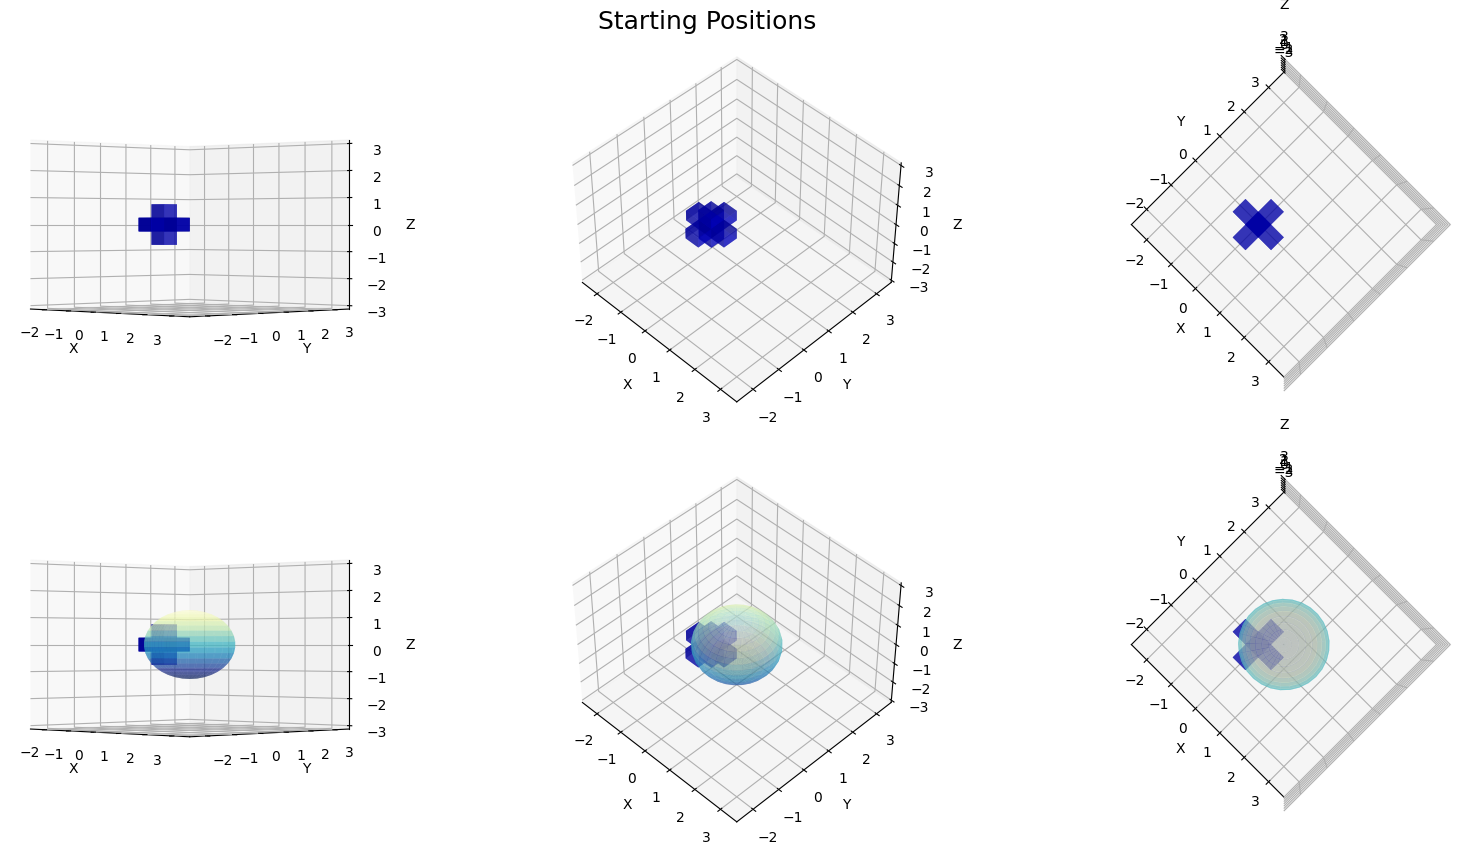

In [ ]:
#@title
sizes = []; colours = []
sizes1 = []; colours1 = []

for i in range(0, len(new_positions)):
  sizes.append(cell_size)
  colours.append("blue")

# for i in range(0, len(new_positions[1])):
#   sizes1.append((1,1,1,))
#   colors1.append("blue")

fig = plt.figure()
# ax1 = fig.add_subplot(2, 4, 1, projection='3d'); ax2 = fig.add_subplot(2, 4, 2, projection='3d'); ax3 = fig.add_subplot(2, 4, 3, projection='3d'); ax4 = fig.add_subplot(2, 4, 4, projection='3d');
# ax5 = fig.add_subplot(2, 4, 5, projection='3d'); ax6 = fig.add_subplot(2, 4, 6, projection='3d'); ax7 = fig.add_subplot(2, 4, 7, projection='3d'); ax8 = fig.add_subplot(2, 4, 8, projection='3d');
ax1 = fig.add_subplot(2, 3, 1, projection='3d'); ax2 = fig.add_subplot(2, 3, 2, projection='3d'); ax3 = fig.add_subplot(2, 3, 3, projection='3d');
ax5 = fig.add_subplot(2, 3, 4, projection='3d'); ax6 = fig.add_subplot(2, 3, 5, projection='3d'); ax7 = fig.add_subplot(2, 3, 6, projection='3d');

fig.set_size_inches(20, 10)

for positions, size, colour in zip(new_positions, sizes, colours):
    plot_cube(position=positions, size=size, ax=ax1, color=colour, alpha=0.4)
    plot_cube(position=positions, size=size, ax=ax2, color=colour, alpha=0.4)
    plot_cube(position=positions, size=size, ax=ax3, color=colour, alpha=0.4)
    # plot_cube(position=positions, size=size, ax=ax4, color=colour, alpha=0.4)
    plot_cube(position=positions, size=size, ax=ax5, color=colour, alpha=0.4)
    plot_cube(position=positions, size=size, ax=ax6, color=colour, alpha=0.4)
    plot_cube(position=positions, size=size, ax=ax7, color=colour, alpha=0.4)
    # plot_cube(position=positions, size=size, ax=ax8, color=colour, alpha=0.4)

# for positions, size, colour in zip(new_positions[1], sizes1, colours1):
#     plot_cube(position=positions, size=size, ax=ax1, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax2, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax3, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax4, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax5, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax6, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax7, color=colour, alpha=0.4)
#     plot_cube(position=positions, size=size, ax=ax8, color=colour, alpha=0.4)

# plotting the droplet boundary/boundaries
r_1 = droplet_1_radius; r_2 = droplet_2_radius
a_1 = droplet_1_semi_major_axis; a_2 = droplet_2_semi_major_axis # semi-major axis
c_1 = droplet_1_semi_minor_axis; c_2 = droplet_2_semi_minor_axis # semi-minor axis
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x_1 = a_1 * r_1 * np.cos(u) * np.sin(v); y_1 = a_1 * r_1 * np.sin(u) * np.sin(v); z_1 = c_1 * r_1 * np.cos(v)
x_2 = a_2 * r_2 * np.cos(u) * np.sin(v); y_2 = a_2 * r_2 * np.sin(u) * np.sin(v); z_2 = c_2 * r_2 * np.cos(v)

droplet_1_movement = []; droplet_2_movement = []
for i in range(0, len(droplet_1_centre)):
  droplet_1_movement.append(droplet_1_centre[i] + (0 * droplet_1_motion[i]))
for i in range(0, len(droplet_2_centre)):
  droplet_2_movement.append(droplet_2_centre[i] + (0 * droplet_2_motion[i]))

ax5.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=0.5)
ax5.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap_1, alpha=0.5)

ax6.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=0.5)
ax6.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap_1, alpha=0.5)

ax7.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=0.5)
ax7.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap_1, alpha=0.5)

# ax8.plot_surface(x_1+droplet_1_movement[0], y_1+droplet_1_movement[1], z_1+droplet_1_movement[2], cmap=cmap, alpha=0.5)
# ax8.plot_surface(x_2+droplet_2_movement[0], y_2+droplet_2_movement[1], z_2+droplet_2_movement[2], cmap=cmap_1, alpha=0.5)

ax1.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax1.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax1.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax2.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax2.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax2.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax3.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax3.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax3.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

# ax4.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
# ax4.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
# ax4.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax5.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax5.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax5.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax6.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax6.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax6.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax7.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax7.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
ax7.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

# ax8.axes.set_xlim3d(left=(droplet_1_movement[0] - zoom*droplet_1_radius*droplet_1_semi_major_axis), right=(droplet_1_movement[0] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
# ax8.axes.set_ylim3d(bottom=(droplet_1_movement[1] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[1] + zoom*droplet_1_radius*droplet_1_semi_major_axis));
# ax8.axes.set_zlim3d(bottom=(droplet_1_movement[2] - zoom*droplet_1_radius*droplet_1_semi_major_axis), top=(droplet_1_movement[2] + zoom*droplet_1_radius*droplet_1_semi_major_axis));

ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
# ax4.set_xlabel('X'); ax4.set_ylabel('Y'); ax4.set_zlabel('Z')
ax5.set_xlabel('X'); ax5.set_ylabel('Y'); ax5.set_zlabel('Z')
ax6.set_xlabel('X'); ax6.set_ylabel('Y'); ax6.set_zlabel('Z')
ax7.set_xlabel('X'); ax7.set_ylabel('Y'); ax7.set_zlabel('Z')
# ax8.set_xlabel('X'); ax8.set_ylabel('Y'); ax8.set_zlabel('Z')

ax1.view_init(0,-45); ax2.view_init(45,-45); ax3.view_init(90, -45); # ax4.view_init(90, -45)
ax5.view_init(0,-45); ax6.view_init(45,-45); ax7.view_init(90, -45); # ax8.view_init(90, -45)

fig.suptitle('Starting Positions', size=18, y=0.925)

plt.show()

# Making the .png files

Run the 'Rules and Conditions for Simulation' cell before this one, otherwise, the life cells will be in the incorrect place at Generation 0.

In [ ]:
#@title
%%capture

# removing unwanted .pngs and .gifs
if path.exists('/content/Images{}'.format(folder_number)) == True:
  shutil.rmtree('/content/Images{}'.format(folder_number), ignore_errors=True)

# creating the directory for the .pngs and .gifs to be saved to
if path.exists('/content/Images{}'.format(folder_number)) == False:
  os.mkdir('/content/Images{}'.format(folder_number))

# finding the centre of the droplet for Generation 0
droplet_1_centre = [droplet_1_centre[0] - droplet_1_motion[0], droplet_1_centre[1] - droplet_1_motion[1], droplet_1_centre[2] - droplet_1_motion[2]]
droplet_2_centre = [droplet_2_centre[0] - droplet_2_motion[0], droplet_2_centre[1] - droplet_2_motion[1], droplet_2_centre[2] - droplet_2_motion[2]]

# producing the images to go into the .gif
plot(zoom, 0, droplet_1_centre, droplet_1_motion, droplet_2_centre, droplet_2_motion, initial_positions, old_positions, new_positions, droplet_1_radius, droplet_2_radius,
     folder_number, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_semi_major_axis, droplet_2_semi_minor_axis, cmap, cmap_1, droplet_transparency, cell_size)

# setting the droplets movement
droplet_1_centre = [droplet_1_centre[0] + droplet_1_motion[0], droplet_1_centre[1] + droplet_1_motion[1], droplet_1_centre[2] + droplet_1_motion[2]]
droplet_2_centre = [droplet_2_centre[0] + droplet_2_motion[0], droplet_2_centre[1] + droplet_2_motion[1], droplet_2_centre[2] + droplet_2_motion[2]]
old_positions = new_positions

# setting up some extra variables
time = 0; time_split = 0;
time_stuck_together = 4; time_for_split = 10;
stored_droplet_2_motion = []
together = False;
# introducing variables for the number of mergers
# if more mergers are needed, add the variables here and include the extra coding lines
time_1 = 0; time_2 = 0; time_3 = 0;
merged_1 = False; merged_2 = False; merged_3 = False; split = False;
key = [n for n in range(0, 51)]
# key = [10*n for n in range(1, 16)]

# going through the Generations
for i in range(1, Generations):
  if new_positions == ([]):
    break
  else:
    new_positions = nextGen(i, old_positions, droplet_1_centre, droplet_2_centre, droplet_1_motion, droplet_2_motion, droplet_1_radius, droplet_2_radius,
                            droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_semi_major_axis, droplet_2_semi_minor_axis, Life_born, Life_survive, cell_size)

    plot(zoom, i, droplet_1_centre, droplet_1_motion, droplet_2_centre, droplet_2_motion, initial_positions, old_positions, new_positions, droplet_1_radius, droplet_2_radius,
        folder_number, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_semi_major_axis, droplet_2_semi_minor_axis, cmap, cmap_1, droplet_transparency, cell_size)

    droplet_1_centre = [droplet_1_centre[0] + droplet_1_motion[0], droplet_1_centre[1] + droplet_1_motion[1], droplet_1_centre[2] + droplet_1_motion[2]]
    droplet_2_centre = [droplet_2_centre[0] + droplet_2_motion[0], droplet_2_centre[1] + droplet_2_motion[1], droplet_2_centre[2] + droplet_2_motion[2]]
    droplet_1_edge = droplet_edge(droplet_1_centre, droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, cell_size)

    # droplet_2_edge = droplet_edge(droplet_2_centre, droplet_2_radius, droplet_2_semi_major_axis, droplet_2_semi_minor_axis)

    # playing with droplet changing direction:
    # if i == 15:
    #   droplet_1_motion = [-droplet_1_motion[0], -droplet_1_motion[1], -droplet_1_motion[2]]

    # playing with droplet growing in size:
    # if i >= 10 and i <= 25:
    #   droplet_1_radius += 0.05

    # # checking for any overlap in the droplets:
    # for index in range(0, len(droplet_1_edge)):
    #   if ((((droplet_1_edge[index][0] - droplet_2_centre[0])**2 + (droplet_1_edge[index][1] - droplet_2_centre[1])**2)/(droplet_2_semi_major_axis**2)) + (((droplet_1_edge[index][2] - droplet_2_centre[2])**2)/(droplet_2_semi_minor_axis**2))) < ((droplet_2_radius)**2) and split == False:
    #     if stored_droplet_2_motion == []:
    #       stored_droplet_2_motion = droplet_2_motion
    #     droplet_2_motion = droplet_1_motion
    #     together = True

    # # playing with collisions/mergers:
    # if together == True and droplet_2_motion == droplet_1_motion:
    #   # collision 1
    #   if droplet_1_radius < splitting_radius and merged_1 == False and time_1 != time_stuck_together:
    #     time_1 += 1
    #   if droplet_1_radius < splitting_radius and merged_1 == False and time_1 == time_stuck_together:
    #     stored_droplet_1_centre = droplet_1_centre
    #     stored_droplet_1_motion = droplet_1_motion
    #     stored_droplet_1_radius = droplet_1_radius
    #     droplet_1_centre = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[0]
    #     droplet_1_motion = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[1]
    #     droplet_1_radius = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[2]
    #     # setting the conditions for the next droplet to collide with droplet 1
    #     if droplet_1_radius >= splitting_radius:
    #       droplet_2_centre = [1000,1000,1000]
    #       droplet_2_motion = droplet_1_motion
    #       droplet_2_radius = 0
    #     else:
    #       droplet_2_centre = [droplet_1_centre[0] + 100*droplet_1_motion[0], droplet_1_centre[1] + 100*droplet_1_motion[1], droplet_1_centre[2] + 100*droplet_1_motion[2]]
    #       droplet_2_motion = [-3*droplet_1_motion[0], -3*droplet_1_motion[1], -3*droplet_1_motion[2]]
    #       droplet_2_radius = 2.5
    #     merged_1 = True; cmap = cmap_2; together = False; stored_droplet_2_motion = []; zoom = (5.0/droplet_1_radius)

    # if together == True and droplet_2_motion == droplet_1_motion and merged_1 == True:
    #   # collision 2
    #   if droplet_1_radius < splitting_radius and merged_2 == False and time_2 != time_stuck_together:
    #     time_2 += 1
    #   if droplet_1_radius < splitting_radius and merged_2 == False and time_2 == time_stuck_together:
    #     stored_droplet_1_centre = droplet_1_centre
    #     stored_droplet_1_motion = droplet_1_motion
    #     stored_droplet_1_radius = droplet_1_radius
    #     droplet_1_centre = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[0]
    #     droplet_1_motion = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[1]
    #     droplet_1_radius = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[2]
    #     # setting the conditions for the next droplet to collide with droplet 1
    #     if droplet_1_radius >= splitting_radius:
    #       droplet_2_centre = [1000,1000,1000]
    #       droplet_2_motion = droplet_1_motion
    #       droplet_2_radius = 0
    #     else:
    #       droplet_2_centre = [droplet_1_centre[0] + 1500*droplet_1_motion[0], droplet_1_centre[1] + 1500*droplet_1_motion[1], droplet_1_centre[2] + 1500*droplet_1_motion[2]]
    #       droplet_2_motion = [-60*droplet_1_motion[0], -60*droplet_1_motion[1], -60*droplet_1_motion[2]]
    #       droplet_2_radius = 2.0
    #     merged_2 = True; cmap = cmap_3; together = False; stored_droplet_2_motion = []; zoom = (5.0/droplet_1_radius)

    # if together == True and droplet_2_motion == droplet_1_motion and merged_2 == True:
    #   # collision 3
    #   if droplet_1_radius < splitting_radius and merged_3 == False and time_3 != time_stuck_together:
    #     time_3 += 1
    #   if droplet_1_radius < splitting_radius and merged_3 == False and time_3 == time_stuck_together:
    #     stored_droplet_1_centre = droplet_1_centre
    #     stored_droplet_1_motion = droplet_1_motion
    #     stored_droplet_1_radius = droplet_1_radius
    #     droplet_1_centre = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[0]
    #     droplet_1_motion = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[1]
    #     droplet_1_radius = merger(stored_droplet_1_centre, stored_droplet_1_radius, droplet_1_semi_major_axis, droplet_1_semi_minor_axis, droplet_2_centre, droplet_2_radius,
    #                               droplet_2_semi_major_axis, droplet_2_semi_minor_axis, stored_droplet_1_motion, stored_droplet_2_motion)[2]
    #     # setting the conditions for the next droplet to collide with droplet 1
    #     if droplet_1_radius >= splitting_radius:
    #       droplet_2_centre = [1000,1000,1000]
    #       droplet_2_motion = droplet_1_motion
    #       droplet_2_radius = 0
    #     else:
    #       droplet_2_centre = [1000,1000,1000]
    #       droplet_2_motion = droplet_1_motion # [-3*droplet_1_motion[0], -3*droplet_1_motion[1], -3*droplet_1_motion[2]]
    #       droplet_2_radius = 1.0
    #     merged_3 = True; cmap = cmap_4; together = False; stored_droplet_2_motion = []; zoom = (5.0/droplet_1_radius)

    # #   # old_positions = new_positions

    # # playing with fragmentation/splitting:
    # if droplet_1_radius >= splitting_radius and time_split != time_for_split:
    #   time_split += 1
    #   droplet_2_centre = [1000, 1000, 1000]
    #   droplet_2_motion = droplet_1_motion
    # if droplet_1_radius >= splitting_radius and time_split == time_for_split:
    #   # droplet_1_centre = droplet_2_centre = droplet_1_centre
    #   zoom = (5.0/droplet_1_radius)
    #   droplet_1_centre = [droplet_1_centre[0] - (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[0], droplet_1_centre[1] - (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[1], droplet_1_centre[2] - (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[2]]
    #   droplet_2_centre = [droplet_1_centre[0] + (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[0], droplet_1_centre[1] + (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[1], droplet_1_centre[2] + (np.sqrt(3)/4)*droplet_1_radius + droplet_1_motion[2]]
    #   droplet_2_radius = 0.5*droplet_1_radius
    #   droplet_1_radius = 0.5*droplet_1_radius
    #   droplet_2_semi_major_axis = droplet_1_semi_major_axis
    #   droplet_2_semi_minor_axis = droplet_1_semi_minor_axis
    #   if droplet_1_motion == [0,0,0]:
    #     droplet_1_motion = [-1,-1,-1]
    #     droplet_2_motion = [1,1,1]
    #   else:
    #     droplet_2_motion = [ droplet_1_motion[0], droplet_1_motion[1], droplet_1_motion[2]]
    #     droplet_1_motion = [ -droplet_1_motion[0], -droplet_1_motion[1], droplet_1_motion[2]]
    #   time_split = 0; cmap = cmap_5; split = True; zoom = (5.0/droplet_1_radius);

    old_positions = new_positions

# Making the .gif file

Turning the .png files into three .gif files (with slow, medium and fast speeds).

In [ ]:
fileList = os.listdir('/content/Images{}'.format(folder_number))

PNG_List = []
for file in fileList:
  if file[-4:] == ".png":
    PNG_List.append(file)

PNG_List = sorted(PNG_List)

# Create the frames
frames = []
imgs = PNG_List
for i in imgs:
    new_frame = Image.open('/content/Images{}/{}'.format(folder_number, i))
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('/content/Images{}/Game_Of_Life_Slow.gif'.format(folder_number), format='gif',
               append_images=frames[1:],
               save_all=True,
               duration=(1000), loop=0)

frames[0].save('/content/Images{}/Game_Of_Life_Medium.gif'.format(folder_number), format='gif',
               append_images=frames[1:],
               save_all=True,
               duration=(600), loop=0)

frames[0].save('/content/Images{}/Game_Of_Life_Fast.gif'.format(folder_number), format='gif',
               append_images=frames[1:],
               save_all=True,
               duration=(200), loop=0)

# Displaying the .gif file

Below are options for displaying the first generation of the Game of Life (Generation 0), or displaying the .gif file at varying speeds (slow, medium and fast).

In [ ]:
IM(open('/content/Images{}/Generation_000.png'.format(folder_number),'rb').read())

In [ ]:
IM(open('/content/Images{}/Game_Of_Life_Slow.gif'.format(folder_number),'rb').read())

In [ ]:
IM(open('/content/Images{}/Game_Of_Life_Medium.gif'.format(folder_number),'rb').read())

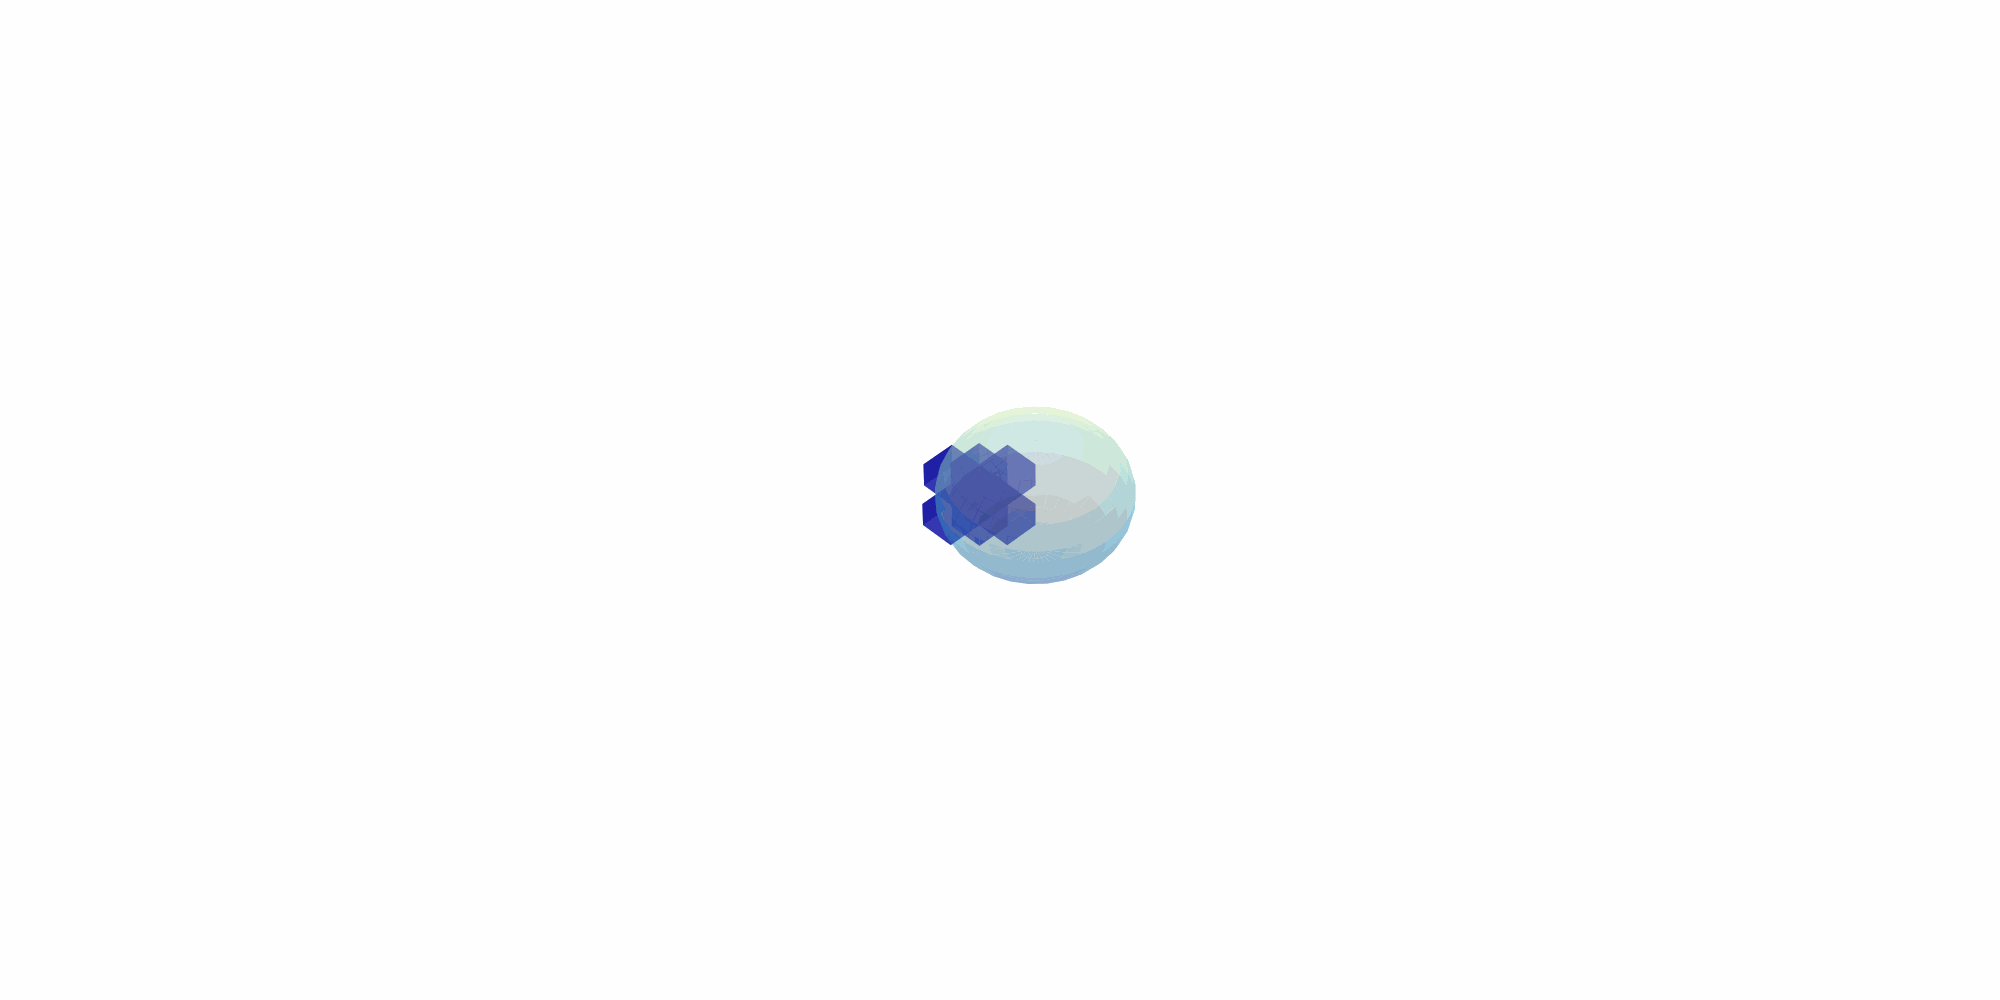

In [ ]:
IM(open('/content/Images{}/Game_Of_Life_Fast.gif'.format(folder_number),'rb').read())

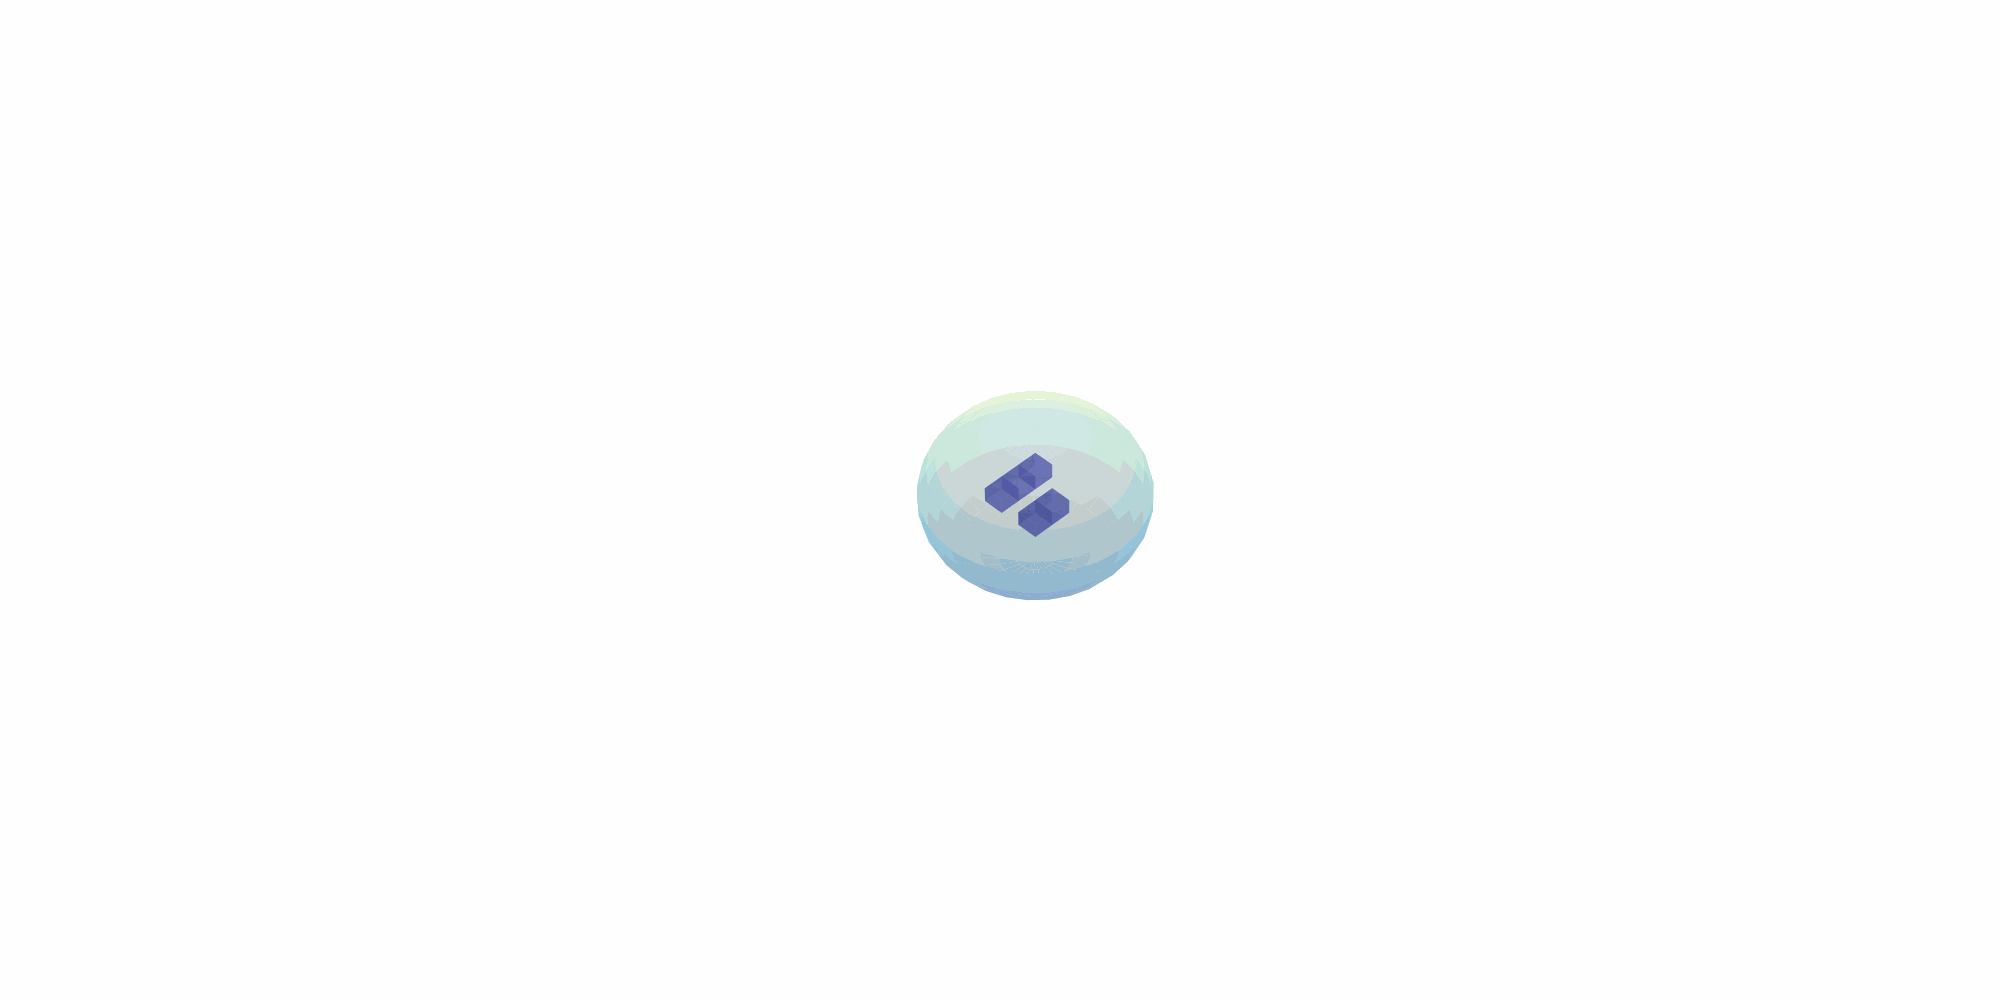

In [ ]:
IM(open('/content/Images{}/Game_Of_Life_Fast.gif'.format(folder_number),'rb').read())

# Downloading .png and .gif files

The .png and .gif files can be downloaded to the local file storage. To download to the local computer, click the three dots next to 'Images0.zip' and click download file.


In [ ]:
dir_to_zip = '/content/Images{}'.format(folder_number) #@param {type: "string"}
output_filename = 'Images{}.zip'.format(folder_number) #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download('Images{}'.format(folder_number))

# Deleting unwanted files

Removing the Images folder from the local file space.

In [ ]:
#deleting Images0
if path.exists('/content/Images{}'.format(folder_number)) == True:
  shutil.rmtree('/content/Images{}'.format(folder_number), ignore_errors=True)

if path.exists('/content/Images{}.zip'.format(folder_number)) == True:
  os.remove('/content/Images{}.zip'.format(folder_number))

# Practicality of Simulation
The mode 3 particles are found in the region; 48.025 km - 55.8 km in altitude. The mode 2 particles are found in a wider range of altitudes.

This suggests that mode 2 and mode 3 particles co-exist.

The number densities of each mode compared to the altitude and the temperature are summarised below:

|Altitude (km)|Mode 1 Number Density (cm-3)|Mode 2 Number Density (cm-3)|Mode 3 Number Density(cm-3)|Temperature (Kelvin)| Temperature (Celsius)|Pressure (bar)|Pressure(atm)|
|-|-|-|-|-|-|-|-|
|65.65|181|9||238.985|-34.165|0.080964|0.079905|
|64.5|211|22||240.7|-32.45|0.100923|0.099603|
|63.05|321|41||240.975|-32.175|0.133113|0.131372|
|61.865|544|53||252.3415|-20.8085|0.163812|0.161669|
|60.725|608|64||253.3|-19.85|0.203598|0.200935|
|59.65|348|71||256.81|-16.34|0.24444|0.241243|
|58.625|197|63||264.1375|-9.0125|0.29265|0.288823|
|57.625|54|58||274.2125|1.0625|0.34695|0.342413|
|56.65|69|29||286.035|12.885|0.40708|0.401757|
|55.8|69|30|17|299.16|26.01|0.4655|0.459413|
|55.1|69|31|30|291.32|18.17|0.518|0.511226|
|54.55|86|30|37|307.395|34.245|0.5633|0.555934|
|54.1|72|32|32|302.49|29.34|0.6011|0.593239|
|53.575|99|38|50|317.82|44.67|0.649492|0.640999|
|53.015|112|37|38|312.444|39.294|0.702188|0.693006|
|52.05|122|44|35|322.43|49.28|0.803445|0.792938|
|52|110|54|48|321.9|48.75|0.8087|0.798125|
|51.9|121|56|40|340.24|67.09|0.82041|0.809681|
|50.85|93|52|39|348.41|75.26|0.94548|0.933116|
|50.35|144|46|14|344.11|70.96|1.01108|0.997858|
|49.9|528|14|15|356.72|83.57|1.0715|1.057488|
|49.475|563|51|126|353.405|80.255|1.133125|1.118307|
|49|404|71|177|349.7|76.55|1.202|1.186281|
|48.525|233|75|72|361.2275|88.0775|1.27895|1.262225|
|48.025|474|59|33|357.6675|84.5175|1.35995|1.342166|
|47.525|128|111||367.54|94.39|1.4495|1.430545|
|47.005|179|||364.628|91.478|1.5431|1.522921|
|46.375|218|34||372.4125|99.2625|1.669625|1.647791|
|44.775|41|||386.8375|113.6875|2.024575|1.9981|
|40.975|46|||415.315|142.165|3.1362|3.095188|

The values for pressure have been interpolated from the data in Table x.


<ipython-input-43-b12178ba5c01>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,3,1)


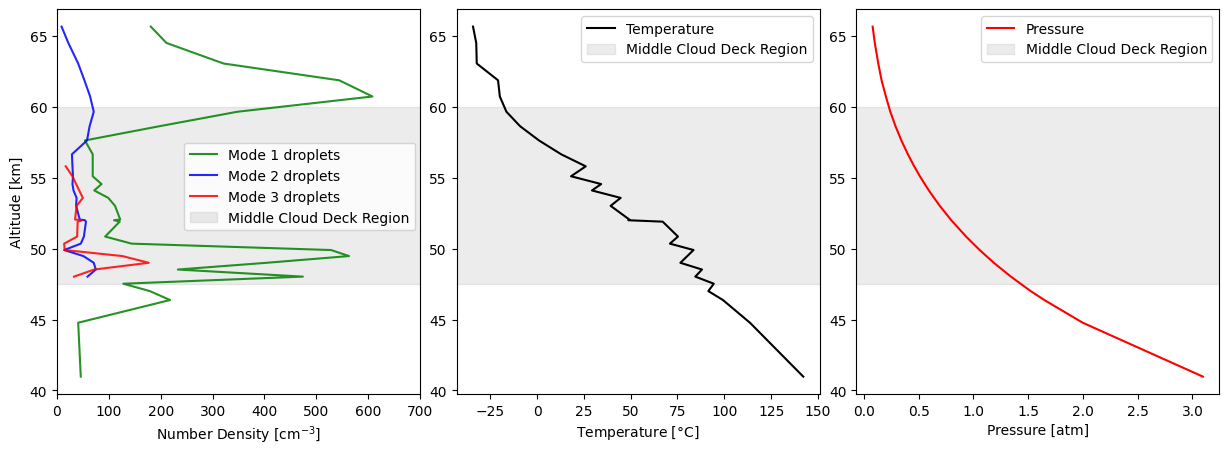

In [ ]:
# @title
mode_1_n = [181, 211, 321, 544, 608, 348, 197, 54, 69, 69, 69, 86, 72, 99, 112, 122, 110, 121, 93, 144, 528, 563, 404, 233, 474, 128, 179, 218, 41, 46]
altitude_mode_1 = [65.65, 64.5, 63.05, 61.865, 60.725, 59.65, 58.625, 57.625, 56.65, 55.8, 55.1, 54.55, 54.1, 53.575, 53.015, 52.05, 52, 51.9, 50.85, 50.35, 49.9,
                   49.475, 49, 48.525, 48.025, 47.525, 47.005, 46.375, 44.775, 40.975]
temperature_k_mode_1 = [238.985, 240.7, 240.975, 252.3415, 253.3, 256.81, 264.1375, 274.2125, 286.035, 299.16, 291.32, 307.395, 302.49, 317.82, 312.444, 322.43,
                        321.9, 340.24, 348.41, 344.11, 356.72, 353.405, 349.7, 361.2275, 357.6675, 367.54, 364.628, 372.4125, 386.8375, 415.315]
temperature_c_mode_1 = [i - 273.15 for i in temperature_k_mode_1]
pressure_mode_1_bar = [0.080964, 0.100923, 0.133113, 0.163812, 0.203598, 0.24444, 0.29265, 0.34695, 0.40708, 0.4655, 0.518, 0.5633, 0.6011, 0.649492, 0.702188,
                       0.803445, 0.8087, 0.82041, 0.94548, 1.01108, 1.0715, 1.133125, 1.202, 1.27895, 1.35995, 1.4495, 1.5431, 1.669625, 2.024575, 3.1362]
pressure_mode_1_atm = [j*0.986923 for j in pressure_mode_1_bar]

mode_2_n = [9, 22, 41, 53, 64, 71, 63, 58, 29, 30, 31, 30, 32, 38, 37, 44, 54, 56, 52, 46, 14, 51, 71, 75, 59]
altitude_mode_2 = [65.65, 64.5, 63.05, 61.865, 60.725, 59.65, 58.625, 57.625, 56.65, 55.8, 55.1, 54.55, 54.1, 53.575, 53.015, 52.05, 52, 51.9, 50.85, 50.35, 49.9,
                   49.475, 49, 48.525, 48.025]
temperature_k_mode_2 = [238.985, 240.7, 240.975, 252.3415, 253.3, 256.81, 264.1375, 274.2125, 286.035, 299.16, 291.32, 307.395, 302.49, 317.82, 312.444, 322.43,
                        321.9, 340.24, 348.41, 344.11, 356.72, 353.405, 349.7, 361.2275, 357.6675]
temperature_c_mode_2 = [i - 273.15 for i in temperature_k_mode_2]
pressure_mode_2_bar = [0.080964, 0.100923, 0.133113, 0.163812, 0.203598, 0.24444, 0.29265, 0.34695, 0.40708, 0.4655, 0.518, 0.5633, 0.6011, 0.649492, 0.702188,
                       0.803445, 0.8087, 0.82041, 0.94548, 1.01108, 1.0715, 1.133125, 1.202, 1.27895, 1.35995]
pressure_mode_2_atm = [j*0.986923 for j in pressure_mode_2_bar]

mode_3_n = [17, 30, 37, 50, 38, 35, 48, 40, 39, 14, 15, 126, 177, 72, 33]
altitude_mode_3 = [55.8, 55.1, 54.55, 53.575, 53.015, 52.05, 52, 51.9, 50.85, 50.35, 49.9, 49.475, 49, 48.525, 48.025]
temperature_k_mode_3 = [299.16, 291.32, 307.395, 302.49, 317.82, 312.444, 322.43, 321.9, 340.24, 348.41, 344.11, 356.72, 353.405, 349.7, 361.2275, 357.6675]
temperature_c_mode_3 = [i - 273.15 for i in temperature_k_mode_3]
pressure_mode_3_bar = [0.4655, 0.518, 0.5633, 0.6011, 0.649492, 0.702188, 0.803445, 0.8087, 0.82041, 0.94548, 1.01108, 1.0715, 1.133125, 1.202, 1.27895, 1.35995]
pressure_mode_3_atm = [j*0.986923 for j in pressure_mode_3_bar]

fig, axs = plt.subplots(3, sharey=True, figsize=(15, 5))
fig.subplots_adjust(wspace=0.1)

ax1 = plt.subplot(1,3,1)
ax1.plot(mode_1_n, altitude_mode_1, color='green', alpha=0.85, ls='-', label="Mode 1 droplets")# number density")
ax1.plot(mode_2_n, altitude_mode_2, color='blue', alpha=0.85, ls='-', label="Mode 2 droplets")# number density")
ax1.plot(mode_3_n, altitude_mode_3, color='red', alpha=0.85, ls='-', label="Mode 3 droplets")# number density")
ax1.set_ylabel("Altitude [km]")
ax1.set_xlabel("Number Density [cm$^{-3}$]")
ax1.set_xlim(0,700)
# ax1.axvspan(40,60, color='orange', alpha=0.3)
ax1.axhspan(47.5, 60, color='grey', alpha=0.15, label='Middle Cloud Deck Region')
# ax1.legend(loc=(0.225, 0.425))
ax1.legend(loc=(0.35, 0.425))
# ax1.legend(loc='center right')

ax2 = plt.subplot(1,3,2)
ax2.plot(temperature_c_mode_1, altitude_mode_1, color='black', label="Temperature")
# ax2.set_ylabel("Altitude [km]")
ax2.set_xlabel("Temperature [$\degree$C]")
ax2.tick_params(left = True, labelleft=True)
# ax2.axvspan(45, 80, color='orange', alpha=0.3)
ax2.axhspan(47.5, 60, color='grey', alpha=0.15, label='Middle Cloud Deck Region')
ax2.legend(loc=1)

ax3 = plt.subplot(1,3,3)
ax3.plot(pressure_mode_1_atm, altitude_mode_1, color='red', label="Pressure")
# ax3.set_ylabel("Altitude [km]")
ax3.set_xlabel("Pressure [atm]")
ax3.tick_params(left = True, labelleft=True)
# ax3.axvspan(0.75, 1.05, color='orange', alpha=0.3)
ax3.axhspan(47.5, 60, color='grey', alpha=0.15, label='Middle Cloud Deck Region')
ax3.legend(loc=1)

plt.show()

Number density is within reasonable bounds as the number density of water droplets in clouds on Earth according to https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/1999JD901004 is between 40x10$^{6}$ to 60x10$^{6}$ m$^{-3}$ (40 to 60 cm$^{-3}$).